In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

output_directory = '/home/marco/DataspellProjects/thesis/output/main/ST001937/'

palette = sns.color_palette(["#2176AB", "#F97662", "#FC9B31", "#FFBF00",  "#A8C43C", "#50C878", "#B284BE"])
sns.set(style="whitegrid", font_scale=1.5)
sns.set_palette(palette)
gradient_palette = sns.blend_palette(palette, 9)

# Carica il CSV in un DataFrame
df = pd.read_csv("../../output/scores.csv")
df = df[df["Dataset"] == "ST001937"].drop(columns=["Dataset"])
df

,Model,auc,accuracy,fpr,tpr
0,AdaBoost,"[0.8566666666666667, 0.8755555555555556, 0.833...","[0.8166666666666667, 0.8666666666666667, 0.733...","[[0.0, 0.03333333333333333, 0.0333333333333333...","[[0.0, 0.0, 0.03333333333333333, 0.06666666666..."
2,KNN,"[0.7833333333333333, 0.9166666666666667, 0.833...","[0.7833333333333333, 0.9166666666666666, 0.833...","[[0.0, 0.2, 1.0], [0.0, 0.03333333333333333, 1...","[[0.0, 0.7666666666666667, 1.0], [0.0, 0.86666..."
4,LDA,"[0.7644444444444445, 0.7755555555555556, 0.763...","[0.6833333333333333, 0.6833333333333333, 0.7, ...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[0.0, 0.03333333333333333, 0.0666666666666666..."
6,Log-reg,"[0.8555555555555555, 0.7922222222222223, 0.763...","[0.7666666666666667, 0.75, 0.8, 0.816666666666...","[[0.0, 0.0, 0.0, 0.03333333333333333, 0.033333...","[[0.0, 0.03333333333333333, 0.0666666666666666..."
8,SVM-rbf,"[0.8455555555555556, 0.9677777777777778, 0.938...","[0.8666666666666667, 0.9166666666666666, 0.916...","[[0.0, 0.0, 0.03333333333333333, 0.03333333333...","[[0.0, 0.03333333333333333, 0.0333333333333333..."
10,RF,"[0.8705555555555555, 0.8783333333333334, 0.852...","[0.8166666666666667, 0.8, 0.7833333333333333, ...","[[0.0, 0.03333333333333333, 0.0333333333333333...","[[0.0, 0.0, 0.03333333333333333, 0.06666666666..."
12,SVM-lin,"[0.8400000000000001, 0.7688888888888888, 0.762...","[0.8333333333333334, 0.7833333333333333, 0.766...","[[0.0, 0.0, 0.0, 0.03333333333333333, 0.033333...","[[0.0, 0.03333333333333333, 0.0666666666666666..."
14,XGB,"[0.9, 0.9299999999999999, 0.8866666666666667, ...","[0.8333333333333334, 0.8666666666666667, 0.833...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[0.0, 0.03333333333333333, 0.0666666666666666..."
16,PLS-DA,"[0.7722222222222223, 0.7422222222222222, 0.751...","[0.7333333333333333, 0.7, 0.75, 0.666666666666...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[0.0, 0.03333333333333333, 0.0666666666666666..."


In [14]:
df['auc'] = df['auc'].apply(eval)

# Transpose DataFrame and set column names
df_auc = df[['Model']].T
df_auc.columns = df_auc.iloc[0]
df_auc = df_auc.drop(df_auc.index[0]).reset_index(drop=True)

# Assign accuracy values to respective columns
for col, auc in zip(df_auc.columns, df['auc']):
    df_auc[col] = auc

sorted_models = df_auc.mean().sort_values().index
# Convert 'Model' column to a categorical data type with custom order
df['Model'] = pd.Categorical(df['Model'], categories=sorted_models, ordered=True)

# Sort 'Model' column according to the custom order
df.sort_values(by='Model', inplace=True)

Roc Curve

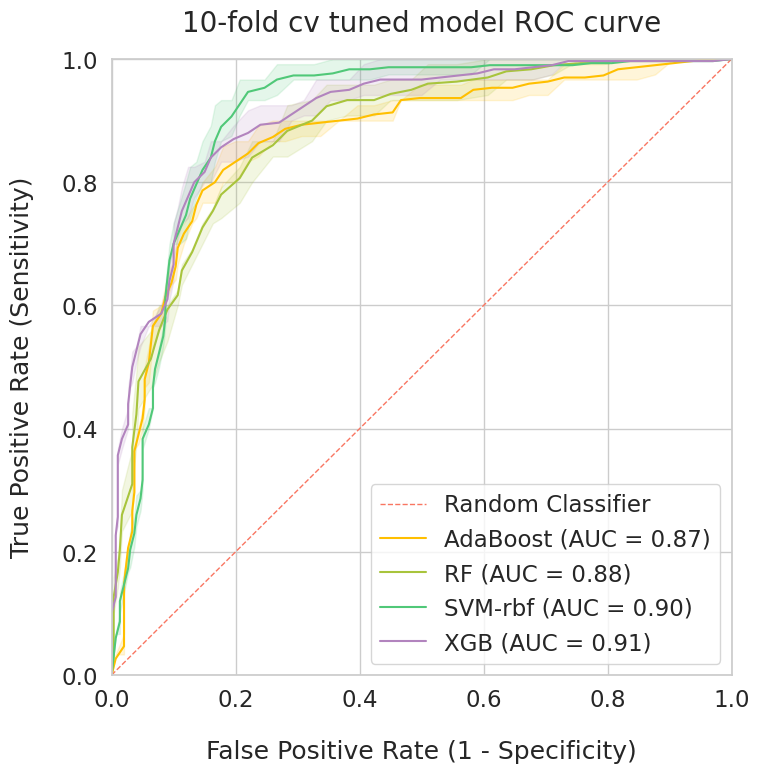

In [15]:
from numpy import asanyarray

df['tpr'] = df['tpr'].apply(eval)
df['fpr'] = df['fpr'].apply(eval)

models = asanyarray(df['Model'].unique())

plt.figure(figsize=(8, 8))
# plotting the random line
plt.plot([0, 1], [0, 1], lw=1, linestyle='--', label='Random Classifier', color=palette[1])


for i, model in enumerate(models[-4:]):
    fpr = df[df['Model'] == model]['fpr'].values[0]
    tpr = df[df['Model'] == model]['tpr'].values[0]
    auc = df[df['Model'] == model]['auc'].values[0]

    max_length_fpr = min([len(lst) for lst in fpr])
    max_length_tpr = min([len(lst) for lst in tpr])
    fpr = [lst[:max_length_fpr] for lst in fpr]
    tpr = [lst[:max_length_tpr] for lst in tpr]

    mean_fpr = np.mean(fpr, axis=0)
    mean_tpr = np.mean(tpr, axis=0)
    mean_auc = np.mean(auc)

    percentile_25_tpr = np.percentile(tpr, 25, axis=0)
    percentile_75_tpr = np.percentile(tpr, 75, axis=0)

    # Plot ROC curve, color gradient based on AUC
    plt.plot(mean_fpr, mean_tpr,
             label=f'{model} (AUC = {mean_auc:.2f})',
             color=palette[(i+3) % len(palette)])

    plt.fill_between(mean_fpr, percentile_25_tpr, percentile_75_tpr,
                     alpha=0.15,
                     color=palette[(i + 3) % len(palette)])

# Personalizza il grafico
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])

plt.xlabel('False Positive Rate (1 - Specificity)', labelpad=20)
plt.ylabel('True Positive Rate (Sensitivity)', labelpad=20)
plt.title('10-fold cv tuned model ROC curve', fontsize=20, pad=20)
plt.legend(loc='lower right')
plt.savefig(output_directory + 'roc_curve.png', dpi=300, bbox_inches='tight')

In [16]:
# Convert accuracy strings to lists
df['accuracy'] = df['accuracy'].apply(eval)

# Transpose DataFrame and set column names
df_acc = df[['Model']].T
df_acc.columns = df_acc.iloc[0]
df_acc = df_acc.drop(df_acc.index[0]).reset_index(drop=True)

# Assign accuracy values to respective columns
for col, acc in zip(df_acc.columns, df['accuracy']):
    df_acc[col] = acc


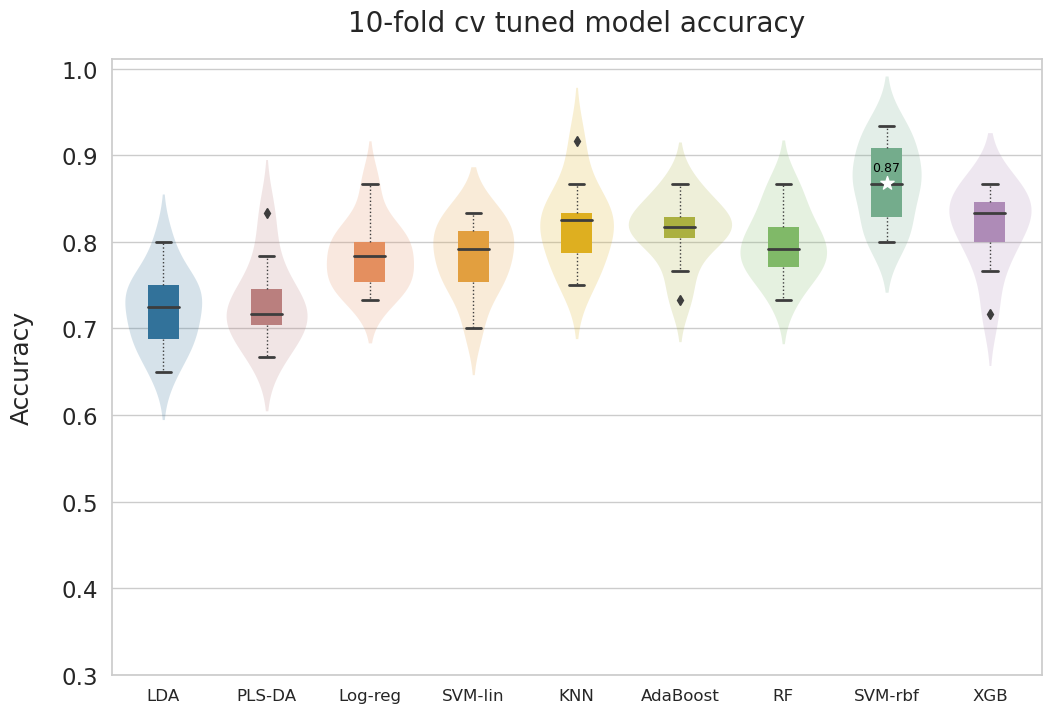

In [17]:

# Create boxplot
plt.figure(figsize=(12, 8))
sns.boxplot(data=df_acc, linewidth=0, width=0.3, palette=gradient_palette,
            medianprops=dict(linestyle='-', linewidth=2),
            boxprops=dict(linewidth=0, alpha=1),
            whiskerprops=dict(linestyle=':', linewidth=1),
            capprops=dict(linestyle='-', linewidth=2))
sns.violinplot(data=df_acc, linewidth=0, alpha=0.3, width=1, palette=gradient_palette)
plt.setp(plt.gca().collections, alpha=.2)

# text annotation on best model
best_model = df_acc.mean().idxmax()
best_accuracy = df_acc.mean().max()
plt.text(df_acc.columns.get_loc(best_model), best_accuracy + 0.01, f'{best_accuracy:.2f}', ha='center', va='bottom',
         fontsize=9, color='black')
plt.scatter(df_acc.columns.get_loc(best_model), best_accuracy, s=100, zorder=10, color='white', marker='*')
plt.yticks(np.arange(0.3, 1.1, 0.1))
plt.xticks(fontsize=12)
plt.ylabel('Accuracy', labelpad=20)
plt.xlabel('', labelpad=20)
plt.title('10-fold cv tuned model accuracy', fontsize=20, pad=20)
plt.savefig(output_directory + 'tuned_model_accuracy.png', dpi=300, bbox_inches='tight')